In [1]:
from neurodsp import timefrequency
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Fs = 256
T = 1
f1 = 5
f2 = 8
f3 = 9


a1 = 2
a2 = 9
a3 = 5

x = np.arange(0, T, 1/Fs)
y1 = a1*np.sin(2 * np.pi * f1 * x)
y2 = a2*np.sin(2 * np.pi * f2 * x)
y3 = a3*np.sin(2 * np.pi * f3 * x)
y = y1 + y2 + y3 + 1

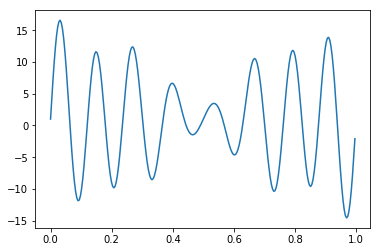

In [3]:
plt.plot(x, y)

In [8]:
np.nanmean(timefrequency.amp_by_time(y, Fs, (f1, f1+1)))

Transition bandwidth is 1.5 Hz. Pass/stop bandwidth is 1 Hz


2.1779210665349833

In [9]:
np.nanmean(timefrequency.amp_by_time(y, Fs, (f2, f2+1)))

Transition bandwidth is 2.5 Hz. Pass/stop bandwidth is 1 Hz


7.327766999066533

In [10]:
np.nanmean(timefrequency.amp_by_time(y, Fs, (f3, f3+1)))

Transition bandwidth is 2.8 Hz. Pass/stop bandwidth is 1 Hz


6.299801016981446

6.122904958174386


/Users/glchau/anaconda3/envs/mne/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


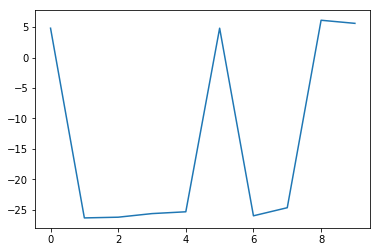

In [19]:
ps = np.log10(np.abs(np.fft.fft(y))**2)


x=np.arange(0, Fs, 1/T)

maxFreq = 10
maxFreqResolution = maxFreq * T
plt.plot(x[:maxFreqResolution], ps[:maxFreqResolution])

lowerFreq = f2
lowerFreqResolution = lowerFreq * T

upperFreq = f2+1
upperFreqResolution = upperFreq * T

print(np.nanmean(ps[lowerFreqResolution:upperFreqResolution]))

(6.122904958174386+0j)


/Users/glchau/anaconda3/envs/mne/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


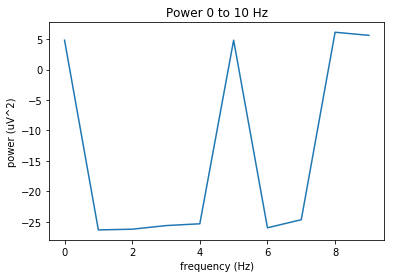

In [21]:
Y = np.fft.fft(y)
ps2 = np.log10(Y * np.conj(Y))

plt.plot(x[:maxFreqResolution], ps2[:maxFreqResolution]); 
plt.xlabel("frequency (Hz)");
plt.ylabel("power (uV^2)");
plt.title("Power 0 to " + str(maxFreq) + " Hz");

print(np.nanmean(ps2[lowerFreqResolution:upperFreqResolution]))